### 얼굴인식 API

* 얼굴이 나타난 이미지 파일을 네이버 api를 이용해 성별, 표정, 나이 등을 추측한다.
* 네이버 api를 사용하기 위해서는 먼저 로그인 한 뒤, 오픈 api 신청해야 한다.


In [1]:
import requests
import json

# 네이버 오픈 api 로그인용
client_id = 'TSrqL2ZxtClPAqqgD3h_'
client_secret = '6b1X47CZ8m'

# 얼굴인식
url = "https://openapi.naver.com/v1/vision/face"
files = {'image' : open('../img/001.jpg', 'rb')}
headers = {'X-Naver-Client-Id' : client_id, 'X-Naver-Client-Secret' : client_secret}

response = requests.post(url, files = files, headers = headers)
parsed = json.loads(response.text)

# json 데이터 포맷으로 이미지 분석 결과 출력
print(json.dumps(parsed, indent = 4, sort_keys = False, ensure_ascii = False))

{
    "info": {
        "size": {
            "width": 2160,
            "height": 2874
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 641,
                "y": 1190,
                "width": 1132,
                "height": 1132
            },
            "landmark": {
                "leftEye": {
                    "x": 923,
                    "y": 1494
                },
                "rightEye": {
                    "x": 1458,
                    "y": 1508
                },
                "nose": {
                    "x": 1182,
                    "y": 1802
                },
                "leftMouth": {
                    "x": 961,
                    "y": 2071
                },
                "rightMouth": {
                    "x": 1393,
                    "y": 2099
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.987721
            }

In [2]:
# 성별, 표정, 나이 각 변수에 저장
x, y, w, h = parsed['faces'][0]['roi'].values()
gender, gen_confidence = parsed['faces'][0]['gender'].values()
emotion, emotion_confidence = parsed['faces'][0]['emotion'].values()
age, age_confidence = parsed['faces'][0]['age'].values()

In [3]:
annotation = gender + ' : ' + str(gen_confidence) + '\n' + emotion + ' : ' + str(emotion_confidence) + \
            '\n' + age + ' : ' + str(age_confidence)
print(annotation)

male : 0.987721
neutral : 0.999976
25~29 : 0.018563


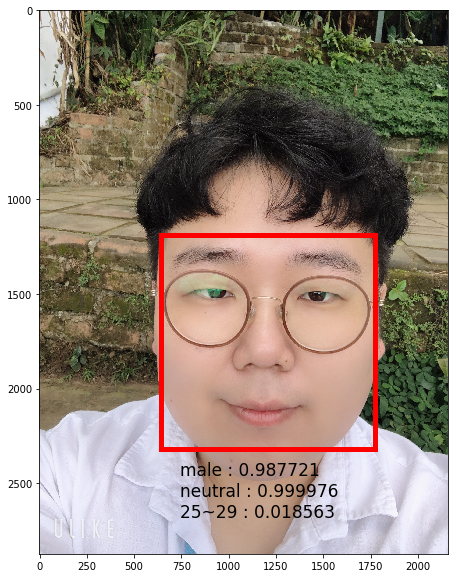

In [4]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

img = mpimg.imread('../img/001.jpg')

fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(img)
rect_face = patches.Rectangle((x, y), w, h, linewidth = 5, edgecolor = 'r', facecolor = 'none')
ax.add_patch(rect_face)

plt.text(x + 100, w + h + 400, annotation, wrap = True, fontsize = 17, color = 'black')
plt.show()

* 정면 사진은 비교적 높은 정확도를 갖는다.
    * **성별**은 *male*로 98% 정확도로 맞췄고, **표정**은 *neutral*한 표정을 갖고 있다. 
    * **나이**는 필터가 들어간 카메라어플을 사용해서인지 촬영일 기준 30세였지만 \
      *25-29세*로 어리게 분석했다.
* 여러 사람이 나온 사진의 경우라면 각각의 얼굴을 분석해준다.
    * 단, 크기가 작아져 정확도는 떨어지고, pose항목이 false_face로 나올 수 있다.
    * 여러 명이 나온 사진에 각각의 정보를 표시하려면 for 문을 사용한다.
    * 단, 나오는 각도가 다르기 때문에 **나이**의 정확도는 떨어질 수 있다.
    * **성별**은 얼굴 정면의 경우 거의 일치하지만, 측면일 때는 정확하지 않다.
    * 인원이 너무 많거나, 보정어플을 사용할 경우 얼굴을 찾을 수 없어 인식이 어렵다.
* 파일 크기가 2MB 이상 넘어가면 분석이 불가능하다.